In [11]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
 
sql = "SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()

df = pd.DataFrame(result, columns=[ 
'Trackid','Name','Album','Media','genres'
  ])

'''
sql2 = "CREATE TABLE assignment (trackid INTEGER NOT NULL,name INTEGER NOT NULL,album INTEGER NOT NULL,media INTEGER NOT NULL,genres INTEGER NOT NULL,PRIMARY KEY(trackid));"
try:
    cursor.execute(sql2)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
'''
#Save the data frame to table'assignment' in oringinal database
df.to_sql('assignment',con,if_exists='replace',index = False)

print('The table for assignment')
df

Entry successfully retrieved.
The table for assignment


,Trackid,Name,Album,Media,genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [7]:
sql2 = "SELECT genres,COUNT(*) AS count FROM assignment INNER JOIN genres ON assignment.genres=genres.Name GROUP BY genres.Name ORDER BY count DESC;"  
try:
    cursor.execute(sql2)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result2 = cursor.fetchall()

con.close()
df2 = pd.DataFrame(result2, columns=[ 
'Genres','Count'
  ])
df2

Entry successfully retrieved.


,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<ipython-input-10-6935a272a937>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()#设置画布，设置画布的框框


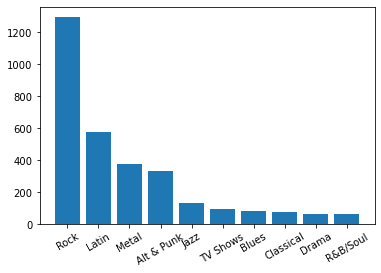

In [10]:
from matplotlib import pyplot as plt

df2.loc[3,'Genres']='Alt & Punk'
genres=df2.loc[0:9,'Genres'].tolist()
count=df2.loc[0:9,'Count'].tolist()

plt.bar(range(len(genres)),count)
# Create your ax object here
ax = plt.subplot()#设置画布，设置画布的框框
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])#x轴的数量
ax.set_xticklabels(genres, rotation=30)#x轴的标签设置
plt.show()